**Importing some Libraries**

In [1]:
# for some basic operations
import numpy as np 
import pandas as pd 

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for providing path
import os
print(os.listdir("../input"))


['web_log_data.csv']


**Importing the Dataset**

In [2]:

data = pd.read_csv('../input/web_log_data.csv')

# getting the shape
data.shape

(5866, 6)

In [3]:
# checking the head of the data

data.head()

,ip,date_time,request,step,session,user_id
0,c210-49-32-6.rochd2.,18/Apr/2005:21:25:07,/,1,3,3
1,visp.inabox.telstra.,19/Apr/2005:08:24:28,/,1,12,12
2,dsl-61-95-54-84.requ,19/Apr/2005:08:33:01,/,1,13,13
3,d220-236-91-52.dsl.n,19/Apr/2005:09:16:06,/,1,15,15
4,allptrs.eq.edu.au,19/Apr/2005:09:47:54,/,1,22,22


In [4]:

# unique date time
print("No. of Unique Dates :", data['date_time'].nunique())
      
# unique ip addresses
print("No. of Unique Ip Addresses :", data['ip'].nunique())
      
# unique user ids
print("No. of Unique User Ids :", data['user_id'].nunique())
      
# unique session id
print("No. of Unique Session Ids :", data['session'].nunique())

No. of Unique Dates : 4901
No. of Unique Ip Addresses : 889
No. of Unique User Ids : 1939
No. of Unique Session Ids : 1939


In [5]:
# describing the data

data.describe()

,step,session,user_id
count,5866.000000,5866.000000,5866.000000
mean,4.795431,1005.006308,1005.006308
std,6.005092,550.326259,550.326259
min,1.000000,1.000000,1.000000
25%,1.000000,569.000000,569.000000
50%,3.000000,994.500000,994.500000
75%,6.000000,1432.000000,1432.000000
max,63.000000,1939.000000,1939.000000


In [6]:
# checking if there is any NULL values in the dataset

data.isnull().sum().sum()

0

## Data Visualization

Text(0.5, 1.0, 'Most Popular Requests by the Users')

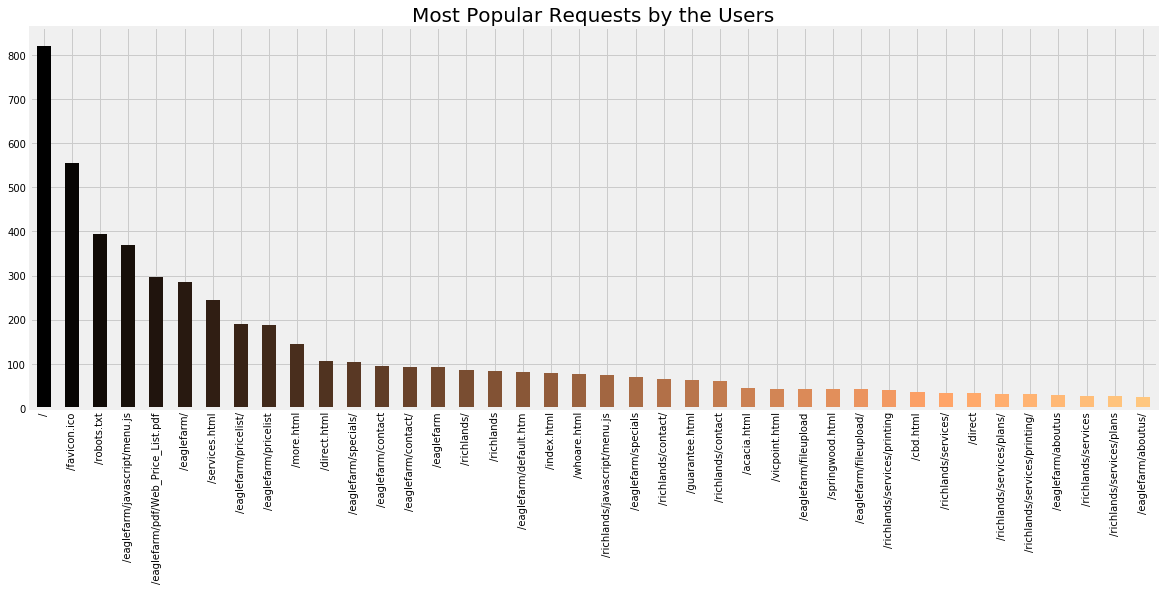

In [7]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.copper(np.linspace(0, 1, 40))
data['request'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Requests by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular Sessions used by the Users')

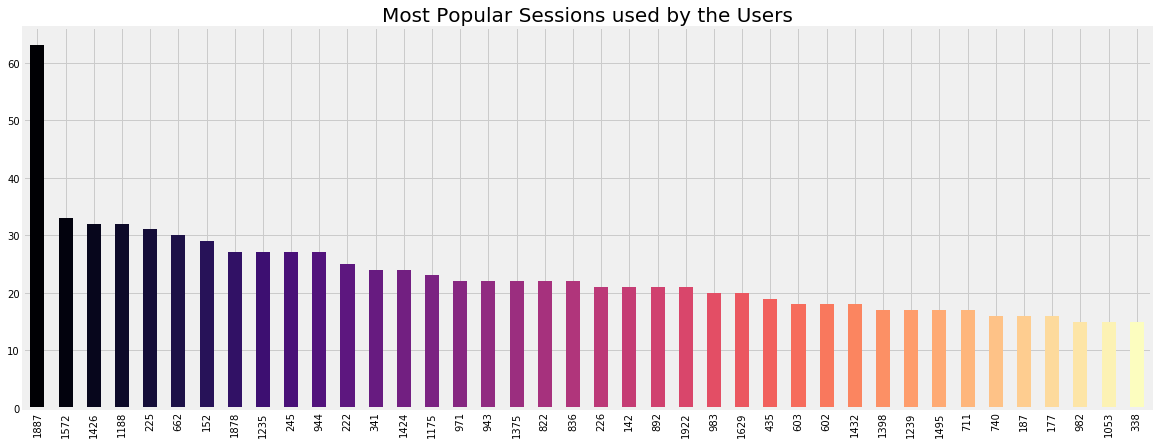

In [8]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.magma(np.linspace(0, 1, 40))
data['session'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular Sessions used by the Users', fontsize = 20)

Text(0.5, 1.0, 'Most Popular step used by the Users')

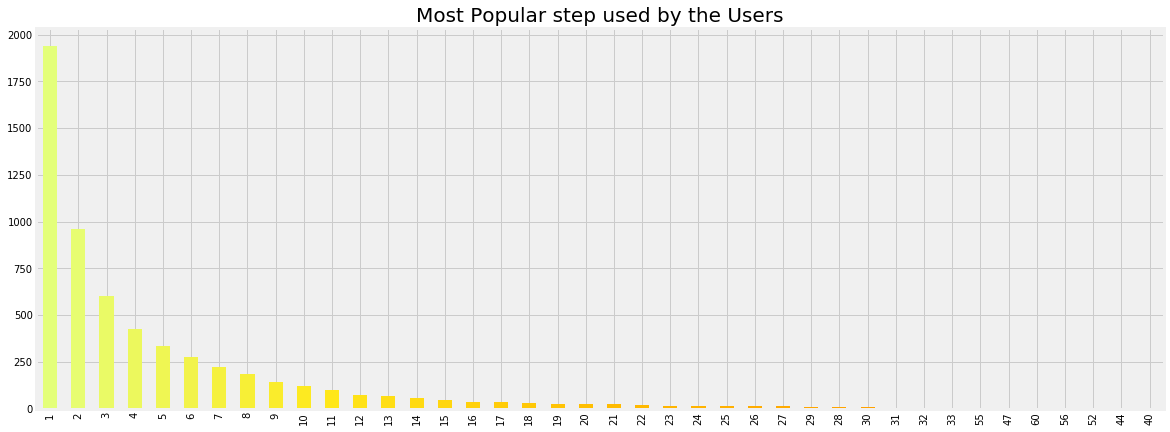

In [9]:
plt.rcParams['figure.figsize'] = (18, 7)

color = plt.cm.Wistia(np.linspace(0, 1, 40))
data['step'].value_counts().head(40).plot.bar(color = color)
plt.title('Most Popular step used by the Users', fontsize = 20)

In [10]:
# extracting some new features from date-time
data['date_time'] = data['date_time'].str.split(':',n = 1, expand = True)

data['date_time']

0       18/Apr/2005
1       19/Apr/2005
2       19/Apr/2005
3       19/Apr/2005
4       19/Apr/2005
5       19/Apr/2005
6       19/Apr/2005
7       19/Apr/2005
8       19/Apr/2005
9       19/Apr/2005
10      19/Apr/2005
11      19/Apr/2005
12      19/Apr/2005
13      19/Apr/2005
14      19/Apr/2005
15      19/Apr/2005
16      19/Apr/2005
17      19/Apr/2005
18      19/Apr/2005
19      19/Apr/2005
20      20/Apr/2005
21      20/Apr/2005
22      20/Apr/2005
23      20/Apr/2005
24      20/Apr/2005
25      20/Apr/2005
26      20/Apr/2005
27      20/Apr/2005
28      20/Apr/2005
29      20/Apr/2005
           ...     
5836    20/May/2005
5837    20/May/2005
5838    22/May/2005
5839    22/May/2005
5840    22/May/2005
5841    23/May/2005
5842    23/May/2005
5843    24/May/2005
5844    24/May/2005
5845    24/May/2005
5846    24/May/2005
5847    24/May/2005
5848    24/May/2005
5849    25/May/2005
5850    25/May/2005
5851    26/May/2005
5852    26/May/2005
5853    26/May/2005
5854    27/May/2005


In [11]:
# converting the date_time into datetime format

data['date_time'] = pd.to_datetime(data['date_time'])
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day

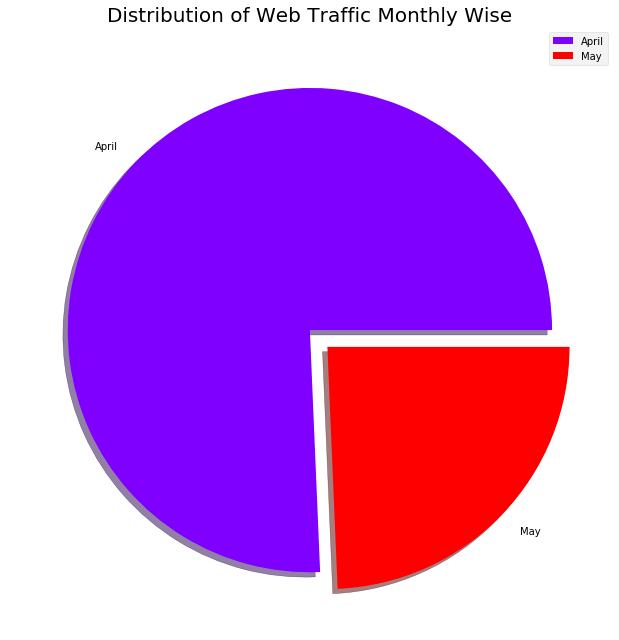

In [12]:
size = data['month'].value_counts()
color = plt.cm.rainbow(np.linspace(0, 1, 2))
labels = "April", "May"
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = color, labels = labels, explode = explode, shadow = True)
plt.title('Distribution of Web Traffic Monthly Wise', fontsize = 20)
plt.tight_layout()
plt.legend()
plt.show()

Text(0.5, 1.0, 'Distribution of Web Traffic Daily Basis')

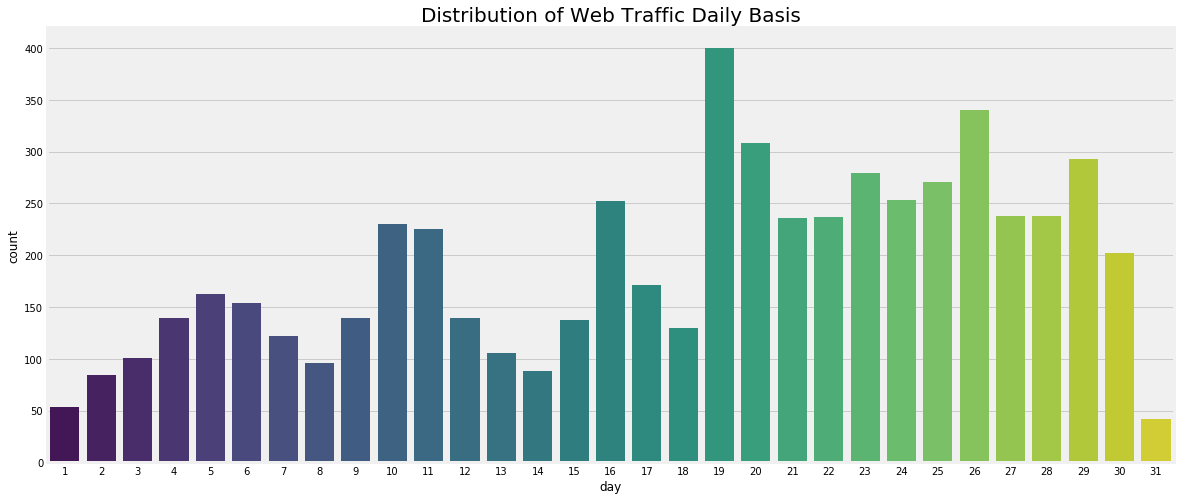

In [13]:

plt.rcParams['figure.figsize'] = (18, 8)
sns.countplot(data['day'], palette = 'viridis')
plt.title('Distribution of Web Traffic Daily Basis', fontsize = 20)

## Clustering Analysis

### Using Kmeans Clustering for analysis

### Elbow Method to find the Optimal number of Clusters

In [14]:
# deleting the unnecasary columns

data = data.drop(['date_time'], axis = 1)

# label encoding the ip address and request
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['ip'] = le.fit_transform(data['ip'])
data['request'] = le.fit_transform(data['request'])

# looking at the columns of the dataset
data.columns

Index(['ip', 'request', 'step', 'session', 'user_id', 'month', 'day'], dtype='object')

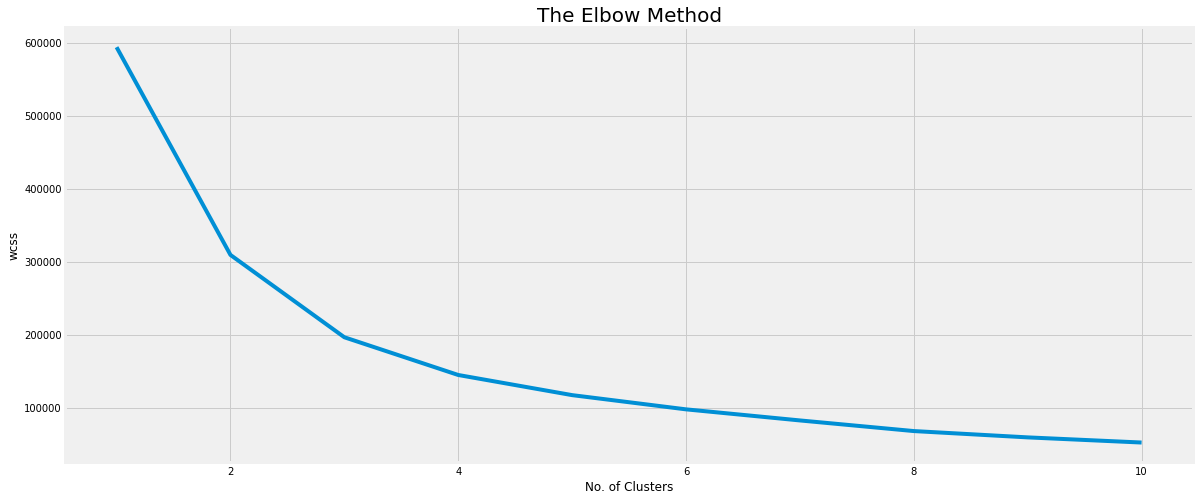

In [15]:
# data preparation

# steps vs Days
x = data.iloc[:, [2, 6]].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  km.fit(x)
  wcss.append(km.inertia_)
  
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

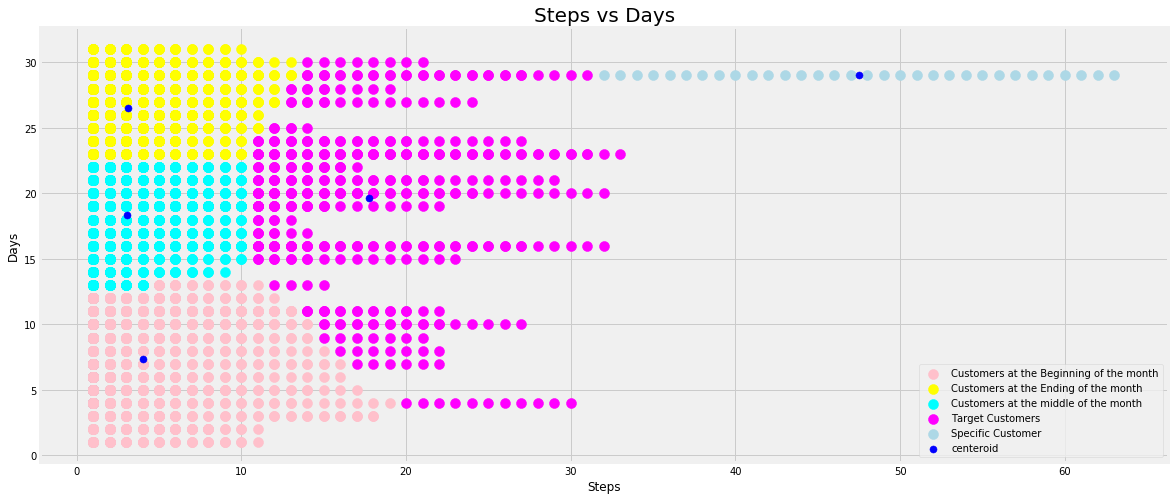

In [16]:
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'Customers at the Beginning of the month')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'Customers at the Ending of the month')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'Customers at the middle of the month')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'Target Customers')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'lightblue', label = 'Specific Customer')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('Steps vs Days', fontsize = 20)
plt.ylabel('Days')
plt.xlabel('Steps')
plt.legend()
plt.show()

## Classification

In [17]:
data.head()

,ip,request,step,session,user_id,month,day
0,284,0,1,3,3,4,18
1,874,0,1,12,12,4,19
2,638,0,1,13,13,4,19
3,593,0,1,15,15,4,19
4,258,0,1,22,22,4,19


In [18]:
# let's try to classify the users on basis of the month they requested access

y = data['month']

data = data.drop(['month'], axis = 1)
x = data

print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)


Shape of x:  (5866, 6)
Shape of y:  (5866,)


In [19]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (4692, 6)
Shape of x_test : (1174, 6)
Shape of y_train : (4692,)
Shape of y_test : (1174,)


In [20]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys


### Modelling

## Random Forest 

Training Accuracy : 1.0
Testing Accuracy : 1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       324
           5       1.00      1.00      1.00       850

   micro avg       1.00      1.00      1.00      1174
   macro avg       1.00      1.00      1.00      1174
weighted avg       1.00      1.00      1.00      1174



/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


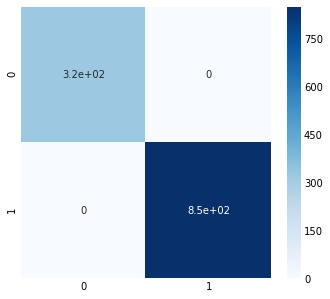

In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'Blues')

cr = classification_report(y_test, y_pred)
print(cr)

#### Feature Importance Plot

Text(0.5, 1.0, 'Feature Importance Plot')

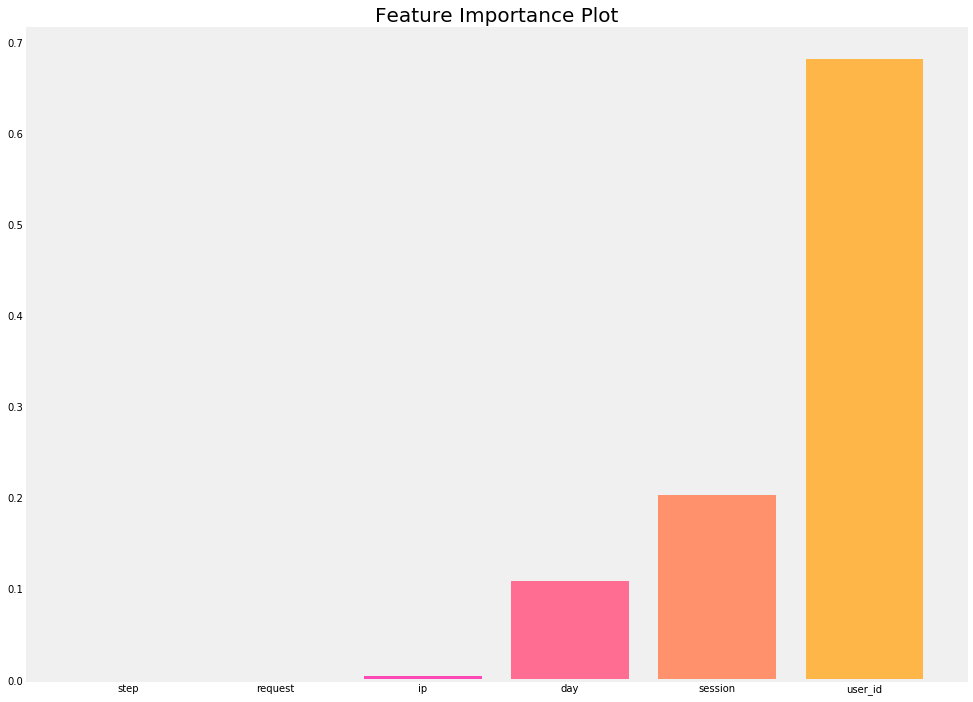

In [22]:
importance = model.feature_importances_
labels = x.columns
indices = np.argsort(importance)
color = plt.cm.spring(np.linspace(0, 1, 8))

plt.rcParams['figure.figsize'] = (15, 12)
plt.bar(range(len(importance)), importance[indices], color = color)
plt.grid()
plt.xticks(range(len(labels)), labels[indices])
plt.title('Feature Importance Plot', fontsize = 20)